In [1]:
import networkx as nx
import seaborn as sns
import pandas as pd
from ipysigma import Sigma
from pelote import monopartite_projection, filter_edges
from collections import Counter

In [57]:
g = nx.read_gexf('../data/theatre_critique_n0_fixed.gexf')

In [60]:
for node, a in g.nodes.data():
    nx.set_node_attributes(g, node, {'status': a['status'], 'type': a['Type'], 'nature': a['Nature'], 'label': a['name']})

TypeError: unhashable type: 'dict'

In [54]:
g.nodes.data()

NodeDataView({'1': {'status': 'IN', 'pages_total': 4987, 'undirected_degree': 566, 'crawling_status': 'FINISHED', 'indegree': 0, 'outdegree': 566, 'creation_date': 1649247043102.0, 'indexing_status': 'FINISHED', 'crawled': True, 'last_modification_date': 1649247550470.0, 'pages_crawled': 304, 'homepage': 'http://abrideabattue.blogspot.com', 'name': 'Abrideabattue.blogspot.com', 'Crawl Source': 'archivesinternet.bnf.fr', 'Crawl': 'Problématique', 'Type': 'critique', 'Nature': 'individu', 'label': 'Abrideabattue.blogspot.com'}, '2': {'status': 'IN', 'pages_total': 1417, 'undirected_degree': 2, 'crawling_status': 'FINISHED', 'indegree': 0, 'outdegree': 2, 'creation_date': 1649247043486.0, 'indexing_status': 'FINISHED', 'crawled': True, 'last_modification_date': 1649247550503.0, 'pages_crawled': 160, 'homepage': 'http://allegrotheatre.blogspot.com', 'name': 'Allegrotheatre.blogspot.com', 'Crawl Source': 'archivesinternet.bnf.fr', 'Type': 'critique', 'Nature': 'individu', 'label': 'Allegrot

In [3]:
critique_to_critique_edges = []

for u, v in g.edges:
    ua = g.nodes[u]
    va = g.nodes[v]
    
    if ua.get('Type') == 'critique' and va.get('Type') == 'critique':
        critique_to_critique_edges.append(((ua.get('Nature', 'na'), ua['label']), (va.get('Nature', 'na'), va['label'])))

In [4]:
critique_to_critique_edges[:5]

[(('individu', 'Abrideabattue.blogspot.com'), ('individu', 'Aubalcon.fr')),
 (('individu', 'Abrideabattue.blogspot.com'),
  ('individu', 'Lestroiscoups.fr')),
 (('individu', 'Annetheatrepassion.blogspot.com'),
  ('individu', 'Aubalcon.fr')),
 (('individu', 'Annetheatrepassion.blogspot.com'),
  ('professionelle', 'Journal-Laterrasse.fr')),
 (('individu', 'Annetheatrepassion.blogspot.com'),
  ('professionelle', 'Loeildolivier.fr'))]

In [5]:
len(critique_to_critique_edges)

140

In [6]:
heatmap_graph = nx.DiGraph()
counts = Counter()

for (u, _), (v, _) in critique_to_critique_edges:
    if 'na' in [u, v]:
        continue
    
    if heatmap_graph.has_edge(u, v):
        heatmap_graph[u][v]['weight'] += 1
    else:
        heatmap_graph.add_edge(u, v, weight=1)
        
    counts[u] += 1
    counts[v] += 1
    
counts.most_common()

for u, v, a in heatmap_graph.edges.data():
    a['normalized_weight'] = a['weight'] / counts[u]

In [7]:
df = nx.to_pandas_adjacency(heatmap_graph)
df

,individu,professionelle,academique,presse
individu,32.0,23.0,1.0,7.0
professionelle,6.0,20.0,4.0,8.0
academique,0.0,3.0,10.0,0.0
presse,11.0,6.0,2.0,3.0


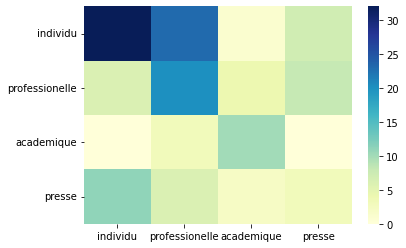

In [8]:
sns.heatmap(df, cmap="YlGnBu")
None

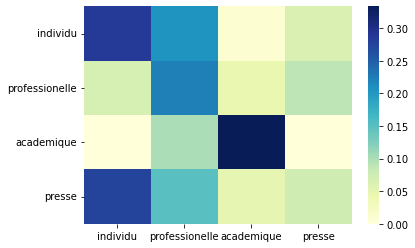

In [9]:
sns.heatmap(nx.to_pandas_adjacency(heatmap_graph, weight='normalized_weight'), cmap="YlGnBu")
None

In [49]:
bipartite_critique = filter_edges(g, lambda u, v, a: not (g.nodes[u].get('Type') == 'critique' and g.nodes[v].get('Type') == 'critique'))

In [50]:
g.size(), bipartite_critique.size()

(934, 794)

In [51]:
monopartite_critique = monopartite_projection(bipartite_critique.to_undirected(), 'critique', node_part_attr='Type')

KeyError: '300'

In [48]:
bipartite_critique.to_undirected().edges('300')

EdgeDataView([('300', '3'), ('300', '52'), ('300', '79'), ('300', '108'), ('300', '183'), ('300', '201'), ('300', '202'), ('300', '206'), ('300', '255'), ('300', '258'), ('300', '263'), ('300', '267'), ('300', '279'), ('300', '280'), ('300', '298'), ('300', '380'), ('300', '419'), ('300', '420'), ('300', '631'), ('300', '1486'), ('300', '3044')])

In [18]:
bipartite_critique.edges('11')

OutEdgeDataView([])